In [88]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

combined_pharma_df = pd.merge(mouse_drug_df, clinical_trial_df, how='outer', on="Mouse ID")

# Display the data table for preview

combined_pharma_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [89]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
grouped_drugs = combined_pharma_df.groupby(['Drug','Timepoint']).mean()["Tumor Volume (mm3)"]

# Convert to DataFrame
grouped_drugs = pd.DataFrame(grouped_drugs)
grouped_drugs.reset_index(level = None, inplace = True)

# Preview DataFrame
grouped_drugs.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [90]:
grouped_drugs.describe()

,Timepoint,Tumor Volume (mm3)
count,100.000000,100.000000
mean,22.500000,52.345216
std,14.433757,8.980674
min,0.000000,34.955595
25%,10.000000,45.000000
50%,22.500000,51.444575
75%,35.000000,59.813482
max,45.000000,70.662958


In [127]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error = combined_pharma_df.groupby(['Drug','Timepoint']).sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
standard_error = pd.DataFrame(standard_error)

# Preview DataFrame

standard_error.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [128]:
standard_error = standard_error.reset_index()
standard_error = pd.DataFrame(standard_error)
standard_error.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [129]:
tumor_sem = standard_error.pivot(index = "Timepoint", columns="Drug")["Tumor Volume (mm3)"]
tumor_sem

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [110]:
# Minor Data Munging to Re-Format the Data Frames

tumor_volume_pivot = grouped_drugs.pivot(index = "Timepoint", columns="Drug")["Tumor Volume (mm3)"]

# Preview that Reformatting worked
tumor_volume_pivot


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


Text(0.5, 1.0, 'Tumor volume (mm2)\n on Placebo')

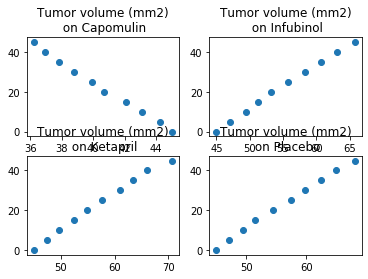

In [102]:
# Generate the Plot (with Error Bars)


y1 = tumor_volume_pivot['Capomulin']
y2 = tumor_volume_pivot['Infubinol']
y3 = tumor_volume_pivot['Ketapril']
y4 = tumor_volume_pivot['Placebo']

x = tumor_volume_pivot.reset_index()['Timepoint']

fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(x1,y)
axs[0, 0].set_title('Tumor volume (mm2)\n on Capomulin')

axs[0, 1].scatter(x2, y)
axs[0, 1].set_title('Tumor volume (mm2)\n on Infubinol')

axs[1, 0].scatter(x3, y)
axs[1, 0].set_title('Tumor volume (mm2)\n on Ketapril')

axs[1, 1].scatter(x4, y)
axs[1, 1].set_title('Tumor volume (mm2)\n on Placebo')


# Save the Figure



In [103]:
# Show the Figure
plt.show()

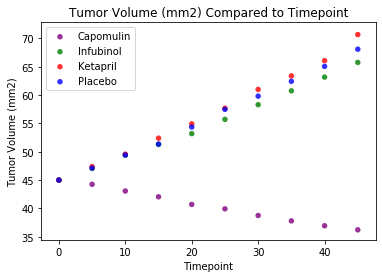

In [107]:
d1 = (x, y1)
d2 = (x,y2)
d3 = (x,y3)
d4 = (x,y4)

data = (d1,d2,d3,d4)
colors = ("purple", "green", "red", "blue")
groups = ("Capomulin", "Infubinol", "Ketapril", "Placebo")
fig = plt.figure()
ax = fig.add_subplot(1,1,1,)

for data, color, group in zip (data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
    
plt.title("Tumor Volume (mm2) Compared to Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm2)")
plt.legend(loc=2)
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [96]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_site = combined_pharma_df.groupby(['Drug','Timepoint']).mean()["Metastatic Sites"]

# Convert to DataFrame
met_site = pd.DataFrame(grouped_drugs)
met_site.reset_index(level = None, inplace = True)

# Preview DataFrame
met_site.head()

,index,Drug,Timepoint,Tumor Volume (mm3)
0,0,Capomulin,0,45.000000
1,1,Capomulin,5,44.266086
2,2,Capomulin,10,43.084291
3,3,Capomulin,15,42.064317
4,4,Capomulin,20,40.716325


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)